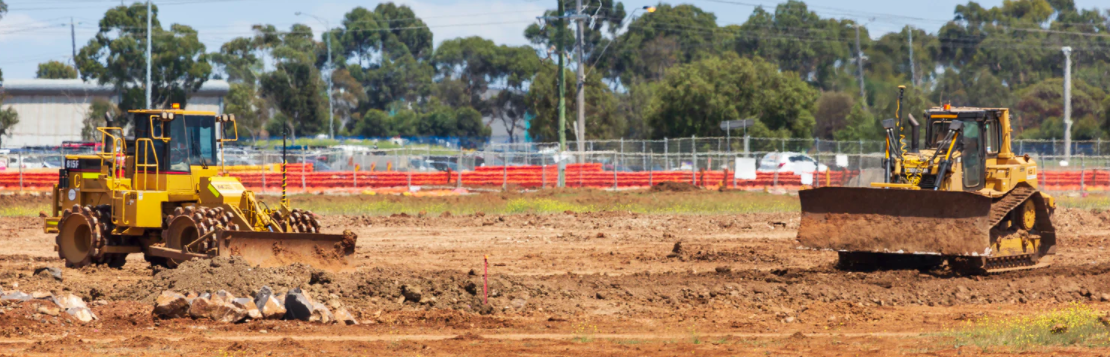

# Bulldozer Price Regression📈

This notebook is about predicting future sale price of bulldozers.

## 1. Problem Definition
> Predict future sale price of bulldozers, using the previous examples of the sale price of the similar bulldozer.

## 2. Data

Three main datasets have been provided from [Kaggle](https://www.kaggle.com/c/bluebook-for-bulldozers/data):

1. **Train.csv** - Historical bulldozer sales examples up to 2011 (close to 400,000 examples with 50+ different attributes, including `SalePrice` which is the **target variable**).
2. **Valid.csv** - Historical bulldozer sales examples from January 1 2012 to April 30 2012 (close to 12,000 examples with the same attributes as **Train.csv**).
3. **Test.csv** - Historical bulldozer sales examples from May 1 2012 to November 2012 (close to 12,000 examples but missing the `SalePrice` attribute, as this is what we'll be trying to predict).

## 3. Evaluation

According to the evalution definition in [Kaggle](https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation):
> The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.


## 4. Features

**Data Dictionary**

In [1]:
# Import library to view file
import pandas as pd

dd = pd.read_csv("data/Data Dictionary.csv")
dd

Variable  \
0                    SalesID   
1                  MachineID   
2                    ModelID   
3                 datasource   
4               auctioneerID   
5                   YearMade   
6   MachineHoursCurrentMeter   
7                  UsageBand   
8                   Saledate   
9                  Saleprice   
10               fiModelDesc   
11               fiBaseModel   
12           fiSecondaryDesc   
13             fiModelSeries   
14         fiModelDescriptor   
15               ProductSize   
16          ProductClassDesc   
17                     State   
18              ProductGroup   
19          ProductGroupDesc   
20              Drive_System   
21                 Enclosure   
22                     Forks   
23                  Pad_Type   
24              Ride_Control   
25                     Stick   
26              Transmission   
27              Turbocharged   
28           Blade_Extension   
29               Blade_Width   
30            Enclosure_Type   
31         Engine_Horsepower   
32                Hydraulics   
33                 Pushblock   
34                    Ripper   
35                 Scarifier   
36               Tip_control   
37                 Tire_Size   
38                   Coupler   
39            Coupler_System   
40            Grouser_Tracks   
41           Hydraulics_Flow   
42                Track_Type   
43   Undercarriage_Pad_Width   
44              Stick_Length   
45                     Thumb   
46           Pattern_Changer   
47              Grouser_Type   
48          Backhoe_Mounting   
49                Blade_Type   
50           Travel_Controls   
51         Differential_Type   
52         Steering_Controls   

                                          Description  
0     unique identifier of a particular sale of a ...  
1     identifier for a particular machine;  machin...  
2     identifier for a unique machine model (i.e. ...  
3     source of the sale record;  some sources are...  
4     identifier of a particular auctioneer, i.e. ...  
5                 year of manufacturer of the Machine  
6     current usage of the machine in hours at tim...  
7     value (low, medium, high) calculated compari...  
8                                        time of sale  
9                                 cost of sale in USD  
10    Description of a unique machine model (see M...  
11                      disaggregation of fiModelDesc  
12                      disaggregation of fiModelDesc  
13                      disaggregation of fiModelDesc  
14                      disaggregation of fiModelDesc  
15                           Don't know what this is   
16    description of 2nd level hierarchical groupi...  
17                    US State in which sale occurred  
18    identifier for top-level hierarchical groupi...  
19    description of top-level hierarchical groupi...  
20  machine configuration;  typcially describes wh...  
21  machine configuration - does machine have an e...  
22  machine configuration - attachment used for li...  
23  machine configuration - type of treads a crawl...  
24  machine configuration - optional feature on lo...  
25           machine configuration - type of control   
26  machine configuration - describes type of tran...  
27  machine configuration - engine naturally aspir...  
28  machine configuration - extension of standard ...  
29             machine configuration - width of blade  
30  machine configuration - does machine have an e...  
31   machine configuration - engine horsepower rating  
32         machine configuration - type of hydraulics  
33                     machine configuration - option  
34  machine configuration - implement attached to ...  
35  machine configuration - implement attached to ...  
36      machine configuration - type of blade control  
37      machine configuration - size of primary tires  
38  machine configuration - type of implement inte...  
39  machine configuration - type of implement inte.

### Preparation of Tools

In [2]:
# Import Libraries for Data Analysis and Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

### Load Data

In [3]:
# Import data
df = pd.read_csv("data/TrainAndValid.csv",
                low_memory=False)

### Data Exploration (Exploratory Data Analysis or EDA)

In [4]:
# Overview of Dataframe
df.head().T

0  \
SalesID                                                    1139246   
SalePrice                                                    66000   
MachineID                                                   999089   
ModelID                                                       3157   
datasource                                                     121   
auctioneerID                                                     3   
YearMade                                                      2004   
MachineHoursCurrentMeter                                        68   
UsageBand                                                      Low   
saledate                                           11/16/2006 0:00   
fiModelDesc                                                   521D   
fiBaseModel                                                    521   
fiSecondaryDesc                                                  D   
fiModelSeries                                                  NaN   
fiModelDescriptor                                              NaN   
ProductSize                                                    NaN   
fiProductClassDesc        Wheel Loader - 110.0 to 120.0 Horsepower   
state                                                      Alabama   
ProductGroup                                                    WL   
ProductGroupDesc                                      Wheel Loader   
Drive_System                                                   NaN   
Enclosure                                               EROPS w AC   
Forks                                          None or Unspecified   
Pad_Type                                                       NaN   
Ride_Control                                   None or Unspecified   
Stick                                                          NaN   
Transmission                                                   NaN   
Turbocharged                                                   NaN   
Blade_Extension                                                NaN   
Blade_Width                                                    NaN   
Enclosure_Type                                                 NaN   
Engine_Horsepower                                              NaN   
Hydraulics                                                 2 Valve   
Pushblock                                                      NaN   
Ripper                                                         NaN   
Scarifier                                                      NaN   
Tip_Control                                                    NaN   
Tire_Size                                      None or Unspecified   
Coupler                                        None or Unspecified   
Coupler_System                                                 NaN   
Grouser_Tracks                                                 NaN   
Hydraulics_Flow                                                NaN   
Track_Type                                                     NaN   
Undercarriage_Pad_Width                                        NaN   
Stick_Length                                                   NaN   
Thumb                                                          NaN   
Pattern_Changer                                                NaN   
Grouser_Type                                                   NaN   
Backhoe_Mounting                                               NaN   
Blade_Type                                                     NaN   
Travel_Controls                                                NaN   
Differential_Type                                         Standard   
Steering_Controls                                     Conventional   

                                                                 1  \
SalesID                                                    1139248   
SalePrice                                                    57000   
MachineID                                                   117657   
Mode

In [5]:
# Check info of Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [6]:
# Check for null values
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

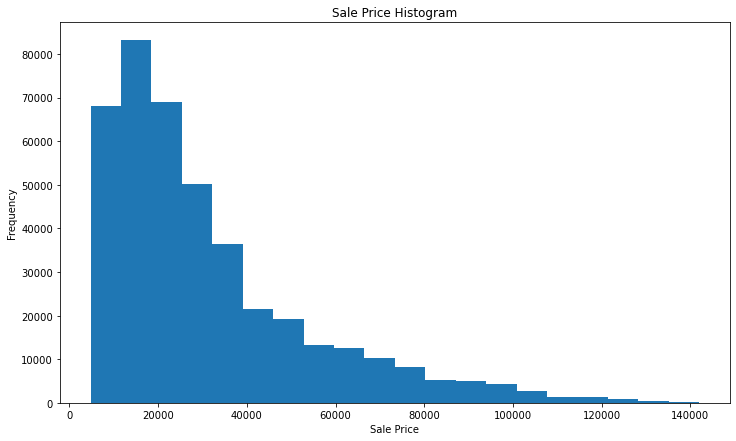

In [7]:
# Sale Price Histogram
plt.figure(figsize=(12, 7))
df.SalePrice.plot.hist(bins=20)
plt.title("Sale Price Histogram")
plt.xlabel("Sale Price");

A large portion of sale price is within the price of 20,000.00.

### Date Parsing

The `saledate` shows as an `Object` datatype which is equivalent to a `string` or word. Parsing the `saledate` to be a `datetime` datatype is necessary.

In [8]:
# Parse Dates
df = pd.read_csv("data/TrainAndValid.csv",
                low_memory=False,
                parse_dates=['saledate'])

In [9]:
# Check saledate datatype for verification
df['saledate'][:5]

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

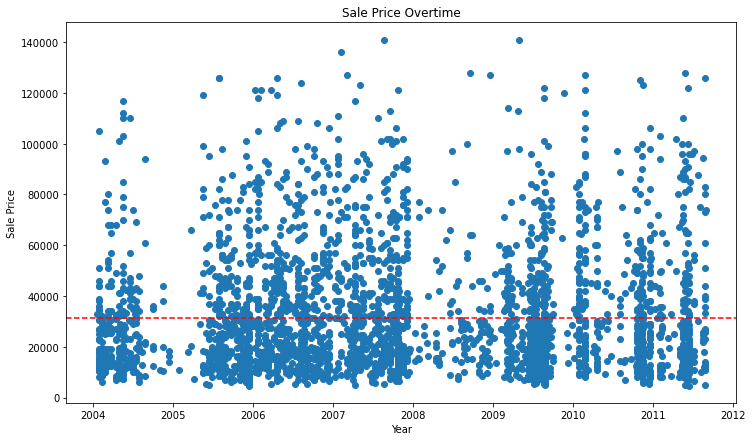

In [10]:
# Visualize Saledate vs SalePrice
fig, ax = plt.subplots(figsize=(12, 7))

# Plot
ax.scatter(df['saledate'][:3000],
           df['SalePrice'][:3000])

# Customize
ax.set(title="Sale Price Overtime",
      xlabel="Year",
      ylabel="Sale Price")

# Mean
ax.axhline(df['SalePrice'].mean(),
          linestyle="--",
          c="red");

**2005**
>Consumer spending slowed abruptly as purchases of motor vehicles collapsed after automakers phased out the generous incentive programs that had lifted sales through the summer. As consumers cut back on spending, business investment also slowed as companies curtailed spending on cars and trucks. Military spending also fell unexpectedly, while a surging import bill put a drag on overall growth. 
Source: [NYTimes](https://www.nytimes.com/2006/01/28/business/us-economy-slowed-sharply-at-end-of-2005.html)

**2008**
>In the early months of 2008, many observers believed that a U.S. recession had begun. The collapse of Bear Stearns and the resulting financial market turbulence signaled that the crisis would not be mild and brief. 
Source: [Wikipedia](https://en.wikipedia.org/wiki/Great_Recession_in_the_United_States)

In [11]:
# Check Sale Count per State
df['state'].value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virginia   

### Modify Dataframe

In [12]:
# Create a duplicate of the DataFrame
df_dup = df.copy()

In [13]:
# Sort dates
df_dup.sort_values(by=['saledate'],
                           inplace=True,
                           ascending=True)
df_dup.head()

SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  \
205615  1646770     9500.0    1126363     8434         132          18.0   
274835  1821514    14000.0    1194089    10150         132          99.0   
141296  1505138    50000.0    1473654     4139         132          99.0   
212552  1671174    16000.0    1327630     8591         132          99.0   
62755   1329056    22000.0    1336053     4089         132          99.0   

        YearMade  MachineHoursCurrentMeter UsageBand   saledate  ...  \
205615      1974                       NaN       NaN 1989-01-17  ...   
274835      1980                       NaN       NaN 1989-01-31  ...   
141296      1978                       NaN       NaN 1989-01-31  ...   
212552      1980                       NaN       NaN 1989-01-31  ...   
62755       1984                       NaN       NaN 1989-01-31  ...   

       Undercarriage_Pad_Width Stick_Length Thumb Pattern_Changer  \
205615                     NaN          NaN   NaN             NaN   
274835                     NaN          NaN   NaN             NaN   
141296                     NaN          NaN   NaN             NaN   
212552                     NaN          NaN   NaN             NaN   
62755                      NaN          NaN   NaN             NaN   

       Grouser_Type     Backhoe_Mounting Blade_Type      Travel_Controls  \
205615          NaN  None or Unspecified   Straight  None or Unspecified   
274835          NaN                  NaN        NaN                  NaN   
141296          NaN  None or Unspecified   Straight  None or Unspecified   
212552          NaN                  NaN        NaN                  NaN   
62755           NaN  None or Unspecified        PAT                Lever   

       Differential_Type Steering_Controls  
205615               NaN               NaN  
274835          Standard      Conventional  
141296               NaN               NaN  
212552          Standard      Conventional  
62755                NaN               NaN  

[5 rows x 53 columns]

### Feature Engineering

Break down `saledate` into different parts. 

In [14]:
# Create datetime parameters
df_dup['saleYear'] = df_dup.saledate.dt.year
df_dup['saleMonth'] = df_dup.saledate.dt.month
df_dup['saleDay'] = df_dup.saledate.dt.day
df_dup['saleDayofWeek'] = df_dup.saledate.dt.dayofweek
df_dup['saleDayofYear'] = df_dup.saledate.dt.dayofyear

# Drop saledate
df_dup.drop('saledate', axis=1, inplace=True)

In [15]:
# Check created columns
df_dup[['saleYear', 'saleMonth', 'saleDay', 'saleDayofWeek', 'saleDayofYear']]

saleYear  saleMonth  saleDay  saleDayofWeek  saleDayofYear
205615      1989          1       17              1             17
274835      1989          1       31              1             31
141296      1989          1       31              1             31
212552      1989          1       31              1             31
62755       1989          1       31              1             31
...          ...        ...      ...            ...            ...
410879      2012          4       28              5            119
412476      2012          4       28              5            119
411927      2012          4       28              5            119
407124      2012          4       28              5            119
409203      2012          4       28              5            119

[412698 rows x 5 columns]

## 5. Modelling

### Convertion of Strings to Categories

In [16]:
# Review dataframe
df_dup.head().T

205615  \
SalesID                                                             1646770   
SalePrice                                                              9500   
MachineID                                                           1126363   
ModelID                                                                8434   
datasource                                                              132   
auctioneerID                                                             18   
YearMade                                                               1974   
MachineHoursCurrentMeter                                                NaN   
UsageBand                                                               NaN   
fiModelDesc                                                            TD20   
fiBaseModel                                                            TD20   
fiSecondaryDesc                                                         NaN   
fiModelSeries                                                           NaN   
fiModelDescriptor                                                       NaN   
ProductSize                                                          Medium   
fiProductClassDesc        Track Type Tractor, Dozer - 105.0 to 130.0 Hor...   
state                                                                 Texas   
ProductGroup                                                            TTT   
ProductGroupDesc                                        Track Type Tractors   
Drive_System                                                            NaN   
Enclosure                                                             OROPS   
Forks                                                                   NaN   
Pad_Type                                                                NaN   
Ride_Control                                                            NaN   
Stick                                                                   NaN   
Transmission                                                   Direct Drive   
Turbocharged                                                            NaN   
Blade_Extension                                                         NaN   
Blade_Width                                                             NaN   
Enclosure_Type                                                          NaN   
Engine_Horsepower                                                       NaN   
Hydraulics                                                          2 Valve   
Pushblock                                                               NaN   
Ripper                                                  None or Unspecified   
Scarifier                                                               NaN   
Tip_Control                                                             NaN   
Tire_Size                                                               NaN   
Coupler                                                                 NaN   
Coupler_System                                                          NaN   
Grouser_Tracks                                                          NaN   
Hydraulics_Flow                                                         NaN   
Track_Type                                                              NaN   
Undercarriage_Pad_Width                                                 NaN   
Stick_Length                                                            NaN   
Thumb                                                                   NaN   
Pattern_Changer                                                         NaN   
Grouser_Type                                                            NaN   
Backhoe_Mounting                                        None or Unspecified   
Blade_Type                                                         Straight   
Travel_Controls                                         None or Unspecified   
Differential_Type                       

In [17]:
# Create a loop to convert each string column
# Use pandas to convert strings into categories
# Assigning category values to strings
for label, content in df_dup.items():
    if pd.api.types.is_string_dtype(content):
        df_dup[label] = content.astype('category').cat.as_ordered()

In [18]:
# Check if conversion succeded
df_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [19]:
# Visual value
df_dup[['ProductSize']].head()

ProductSize
205615      Medium
274835         NaN
141296       Large
212552         NaN
62755          NaN

In [20]:
# Check if category code is working
df_dup['ProductSize'].cat.codes

205615    3
274835   -1
141296    1
212552   -1
62755    -1
         ..
410879   -1
412476   -1
411927    4
407124   -1
409203   -1
Length: 412698, dtype: int8

### Splitting Data | Training and Validation Sets

1. **Train.csv** - Historical bulldozer sales examples up to 2011 (close to 400,000 examples with 50+ different attributes, including `SalePrice` which is the **target variable**).
2. **Valid.csv** - Historical bulldozer sales examples from January 1 2012 to April 30 2012 (close to 12,000 examples with the same attributes as **Train.csv**).
3. **Test.csv** - Historical bulldozer sales examples from May 1 2012 to November 2012 (close to 12,000 examples but missing the `SalePrice` attribute, as this is what we'll be trying to predict).

In [21]:
df_dup["saleYear"].value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [22]:
df_dup.dtypes

SalesID                        int64
SalePrice                    float64
MachineID                      int64
ModelID                        int64
datasource                     int64
auctioneerID                 float64
YearMade                       int64
MachineHoursCurrentMeter     float64
UsageBand                   category
fiModelDesc                 category
fiBaseModel                 category
fiSecondaryDesc             category
fiModelSeries               category
fiModelDescriptor           category
ProductSize                 category
fiProductClassDesc          category
state                       category
ProductGroup                category
ProductGroupDesc            category
Drive_System                category
Enclosure                   category
Forks                       category
Pad_Type                    category
Ride_Control                category
Stick                       category
Transmission                category
Turbocharged                category
B

In [23]:
# Split Data
# Validation & Train Set
df_val = df_dup[df_dup['saleYear'] == 2012]
df_train = df_dup[df_dup['saleYear'] != 2012]

In [24]:
df_dup.shape, df_train.shape, df_val.shape

((412698, 57), (401125, 57), (11573, 57))

### Fill Missing Values

Filling missing values should be done after splitting the data in our model to prevent the influence of future data to past data.

**Filling and Converting Categorical Variables to Numbers (Training)**

In [25]:
# Check for string columns
for label, content in df_train.items():
    # NOT numeric
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [26]:
# Fill missing values with median
for label, content in df_train.items():
    # NOT Numeric
    if not pd.api.types.is_numeric_dtype(content):
            # For good practice, it is safer to create a binary column
            # Since there might be a reason why the value is missing
            df_train[label + "_is_missing"] = pd.isnull(content)
            # Some categories when turned turns to -1 - need to be positive
            df_train[label] = pd.Categorical(content).codes + 1

<ipython-input-26-6081d1cf1d45>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[label + "_is_missing"] = pd.isnull(content)
<ipython-input-26-6081d1cf1d45>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[label] = pd.Categorical(content).codes + 1


In [27]:
# Check for missing values
df_train.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 101, dtype: int64

**Filling and Converting Categorical Variables to Numbers (Validation)**

In [28]:
# Check for string columns
for label, content in df_val.items():
    # NOT numeric
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [29]:
# Fill missing values with median
for label, content in df_val.items():
    # NOT Numeric
    if not pd.api.types.is_numeric_dtype(content):
            # For good practice, it is safer to create a binary column
            # Since there might be a reason why the value is missing
            df_val[label + "_is_missing"] = pd.isnull(content)
            # Some categories when turned turns to -1 - need to be positive
            df_val[label] = pd.Categorical(content).codes + 1

<ipython-input-29-4a92e04d99dc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val[label + "_is_missing"] = pd.isnull(content)
<ipython-input-29-4a92e04d99dc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val[label] = pd.Categorical(content).codes + 1


In [30]:
# Check for missing values
df_val.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 101, dtype: int64

**Fill Numerical Values in Train Set**

In [31]:
# Loop through each numerical column that as null values
for label, content in df_train.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [32]:
# Fill missing values with median
for label, content in df_train.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # For good practice, it is safer to create a binary column
            # Since there might be a reason why the value is missing
            df_train[label + "_is_missing"] = pd.isnull(content)
            df_train[label] = content.fillna(content.median())

<ipython-input-32-9fe6075f389c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[label + "_is_missing"] = pd.isnull(content)
<ipython-input-32-9fe6075f389c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[label] = content.fillna(content.median())


In [33]:
# Check if numerical columns null values is 0
df_train.isna().sum()

SalesID                                0
SalePrice                              0
MachineID                              0
ModelID                                0
datasource                             0
                                      ..
Travel_Controls_is_missing             0
Differential_Type_is_missing           0
Steering_Controls_is_missing           0
auctioneerID_is_missing                0
MachineHoursCurrentMeter_is_missing    0
Length: 103, dtype: int64

In [34]:
# Columns was unequal when data is split, drop column that does not match.
df_train.drop("auctioneerID_is_missing", axis=1, inplace=True)

/Users/nikkoroque/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


**Fill Numerical Values in Validation Set**

In [35]:
# Loop through each numerical column that as null values
for label, content in df_val.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

MachineHoursCurrentMeter


In [36]:
# Fill missing values with median
for label, content in df_val.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # For good practice, it is safer to create a binary column
            # Since there might be a reason why the value is missing
            df_val[label + "_is_missing"] = pd.isnull(content)
            df_val[label] = content.fillna(content.median())

<ipython-input-36-e5ee919acbb6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val[label + "_is_missing"] = pd.isnull(content)
<ipython-input-36-e5ee919acbb6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val[label] = content.fillna(content.median())


In [37]:
# Check if numerical columns null values is 0
df_val.isna().sum()

SalesID                                0
SalePrice                              0
MachineID                              0
ModelID                                0
datasource                             0
                                      ..
Blade_Type_is_missing                  0
Travel_Controls_is_missing             0
Differential_Type_is_missing           0
Steering_Controls_is_missing           0
MachineHoursCurrentMeter_is_missing    0
Length: 102, dtype: int64

**Filling and Converting Categorical Variables to Numbers (Validation)**

In [38]:
# Check for string columns
for label, content in df_val.items():
    # NOT numeric
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

In [39]:
# Fill missing values with median
for label, content in df_val.items():
    # NOT Numeric
    if not pd.api.types.is_numeric_dtype(content):
            # For good practice, it is safer to create a binary column
            # Since there might be a reason why the value is missing
            df_val[label + "_is_missing"] = pd.isnull(content)
            # Some categories when turned turns to -1 - need to be positive
            df_val[label] = pd.Categorical(content).codes + 1

In [40]:
df_val.isna().sum()

SalesID                                0
SalePrice                              0
MachineID                              0
ModelID                                0
datasource                             0
                                      ..
Blade_Type_is_missing                  0
Travel_Controls_is_missing             0
Differential_Type_is_missing           0
Steering_Controls_is_missing           0
MachineHoursCurrentMeter_is_missing    0
Length: 102, dtype: int64

### Evaluation Function

>The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.


In [41]:
# Create an evaluation function
# Import ML Library
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Calculate root mean squared log error between predictions 
    and true labels
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def display_score(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": model.score(X_train, y_train),
              "Valid R^2": model.score(X_valid, y_valid)}
    return scores

In [42]:
# Split Data into X and y
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train["SalePrice"]
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val["SalePrice"]

# Check shape
c_shapes = [X_train, y_train, X_valid, y_valid]

# Loop through each one to check shape
for i in c_shapes:
    print(i.shape)

(401125, 101)
(401125,)
(11573, 101)
(11573,)


In [43]:
X_train.shape, y_train.shape

((401125, 101), (401125,))

### Import Machine Learning Model

In [44]:
# Import ML Library
from sklearn.ensemble import RandomForestRegressor
import time

In [45]:
# Instantiate model
model = RandomForestRegressor(n_jobs=-1,
                              random_state=9,
                              max_samples=10000)

In [46]:
%%time

# Cut down the max number of samples each tree can see
model.fit(X_train, y_train)

CPU times: user 34.5 s, sys: 589 ms, total: 35.1 s
Wall time: 6.34 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=9)

In [47]:
# Baseline Model
display_score(model)

{'Training MAE': 5558.981836410097,
 'Valid MAE': 7202.542003801953,
 'Training RMSLE': 0.25763292626724116,
 'Valid RMSLE': 0.2956976682732503,
 'Training R^2': 0.8607192569523823,
 'Valid R^2': 0.8332277201796714}

### Hyperparameter Tuning with RandomizedSearchCV

In [48]:
%%time

# Import Libary
from sklearn.model_selection import RandomizedSearchCV

# RandomForestClassifier Hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

# Instantiate model
rs_model = RandomizedSearchCV(RandomForestRegressor(),
                             param_distributions=rf_grid,
                             n_iter=100,
                             verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 35.3min finished


CPU times: user 32min 17s, sys: 2min 58s, total: 35min 15s
Wall time: 35min 32s


RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [49]:
# Check best parameters
rs_model.best_params_

{'n_estimators': 70,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [50]:
# Evaluate Score
display_score(rs_model)

{'Training MAE': 5654.672927822599,
 'Valid MAE': 7287.787269824026,
 'Training RMSLE': 0.2615162680979564,
 'Valid RMSLE': 0.29763447732509063,
 'Training R^2': 0.8555717406767954,
 'Valid R^2': 0.8270341855565018}

In [51]:
# Baseline model
display_score(model)

{'Training MAE': 5558.981836410097,
 'Valid MAE': 7202.542003801953,
 'Training RMSLE': 0.25763292626724116,
 'Valid RMSLE': 0.2956976682732503,
 'Training R^2': 0.8607192569523823,
 'Valid R^2': 0.8332277201796714}

### Train model with best parameters

In [52]:
%%time
# Best params model
bp_model = RandomForestRegressor(n_estimators = 70,
                                 min_samples_split = 14,
                                 min_samples_leaf = 5,
                                 max_samples = 10000,
                                 max_features = 0.5,
                                 max_depth = None,
                                random_state=9)

# Fitting
bp_model.fit(X_train, y_train)

CPU times: user 8.57 s, sys: 493 ms, total: 9.06 s
Wall time: 9.21 s


RandomForestRegressor(max_features=0.5, max_samples=10000, min_samples_leaf=5,
                      min_samples_split=14, n_estimators=70, random_state=9)

In [53]:
# bp_model
display_score(bp_model)

{'Training MAE': 6117.202988598922,
 'Valid MAE': 7471.698661233143,
 'Training RMSLE': 0.2777410116651722,
 'Valid RMSLE': 0.30278844612517436,
 'Training R^2': 0.8332492690701594,
 'Valid R^2': 0.8177397303319689}

In [54]:
# rs_model
display_score(rs_model)

{'Training MAE': 5654.672927822599,
 'Valid MAE': 7287.787269824026,
 'Training RMSLE': 0.2615162680979564,
 'Valid RMSLE': 0.29763447732509063,
 'Training R^2': 0.8555717406767954,
 'Valid R^2': 0.8270341855565018}

In [55]:
# baseline mode
display_score(model)

{'Training MAE': 5558.981836410097,
 'Valid MAE': 7202.542003801953,
 'Training RMSLE': 0.25763292626724116,
 'Valid RMSLE': 0.2956976682732503,
 'Training R^2': 0.8607192569523823,
 'Valid R^2': 0.8332277201796714}

RMSLE result with best parameters on validation set is .302788446.

### Test Data Predictions

In [56]:
# Import test data
df_test = pd.read_csv("data/Test.csv", parse_dates=["saledate"])

df_test.head()

SalesID  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0  1227829    1006309     3168         121             3      1999   
1  1227844    1022817     7271         121             3      1000   
2  1227847    1031560    22805         121             3      2004   
3  1227848      56204     1269         121             3      2006   
4  1227863    1053887    22312         121             3      2005   

   MachineHoursCurrentMeter UsageBand   saledate fiModelDesc  ...  \
0                    3688.0       Low 2012-05-03        580G  ...   
1                   28555.0      High 2012-05-10         936  ...   
2                    6038.0    Medium 2012-05-10    EC210BLC  ...   
3                    8940.0      High 2012-05-10       330CL  ...   
4                    2286.0       Low 2012-05-10        650K  ...   

  Undercarriage_Pad_Width         Stick_Length   Thumb      Pattern_Changer  \
0                     NaN                  NaN     NaN                  NaN   
1                     NaN                  NaN     NaN                  NaN   
2     None or Unspecified                9' 6"  Manual  None or Unspecified   
3     None or Unspecified  None or Unspecified  Manual                  Yes   
4                     NaN                  NaN     NaN                  NaN   

  Grouser_Type     Backhoe_Mounting Blade_Type      Travel_Controls  \
0          NaN                  NaN        NaN                  NaN   
1          NaN                  NaN        NaN                  NaN   
2       Double                  NaN        NaN                  NaN   
3       Triple                  NaN        NaN                  NaN   
4          NaN  None or Unspecified        PAT  None or Unspecified   

  Differential_Type Steering_Controls  
0               NaN               NaN  
1          Standard      Conventional  
2               NaN               NaN  
3               NaN               NaN  
4               NaN               NaN  

[5 rows x 52 columns]

### Preprocess Data

In [57]:
# Preprocessing Function
def preprocess_data(df):
    """
    Transforms df
    """
    # Add datetime parameters for saledate
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayofweek"] = df.saledate.dt.dayofweek
    df["saleDayofyear"] = df.saledate.dt.dayofyear

    # Drop original saledate
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill numeric rows with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())
                
        # Turn categorical variables into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add the +1 because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1        
    
    return df

In [58]:
# Run dataframe through preprocessing function
df_test = preprocess_data(df_test)

In [59]:
# Check Dataframe
df_test.head()

SalesID  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0  1227829    1006309     3168         121             3      1999   
1  1227844    1022817     7271         121             3      1000   
2  1227847    1031560    22805         121             3      2004   
3  1227848      56204     1269         121             3      2006   
4  1227863    1053887    22312         121             3      2005   

   MachineHoursCurrentMeter  UsageBand  fiModelDesc  fiBaseModel  ...  \
0                    3688.0          2          499          180  ...   
1                   28555.0          1          831          292  ...   
2                    6038.0          3         1177          404  ...   
3                    8940.0          1          287          113  ...   
4                    2286.0          2          566          196  ...   

   Undercarriage_Pad_Width_is_missing  Stick_Length_is_missing  \
0                                True                     True   
1                                True                     True   
2                               False                    False   
3                               False                    False   
4                                True                     True   

   Thumb_is_missing  Pattern_Changer_is_missing  Grouser_Type_is_missing  \
0              True                        True                     True   
1              True                        True                     True   
2             False                       False                    False   
3             False                       False                    False   
4              True                        True                     True   

   Backhoe_Mounting_is_missing  Blade_Type_is_missing  \
0                         True                   True   
1                         True                   True   
2                         True                   True   
3                         True                   True   
4                        False                  False   

   Travel_Controls_is_missing  Differential_Type_is_missing  \
0                        True                          True   
1                        True                         False   
2                        True                          True   
3                        True                          True   
4                       False                          True   

   Steering_Controls_is_missing  
0                          True  
1                         False  
2                          True  
3                          True  
4                          True  

[5 rows x 101 columns]

In [60]:
X_train.head()

SalesID  MachineID  ModelID  datasource  auctioneerID  YearMade  \
205615  1646770    1126363     8434         132          18.0      1974   
274835  1821514    1194089    10150         132          99.0      1980   
141296  1505138    1473654     4139         132          99.0      1978   
212552  1671174    1327630     8591         132          99.0      1980   
62755   1329056    1336053     4089         132          99.0      1984   

        MachineHoursCurrentMeter  UsageBand  fiModelDesc  fiBaseModel  ...  \
205615                       0.0          0         4593         1744  ...   
274835                       0.0          0         1820          559  ...   
141296                       0.0          0         2348          713  ...   
212552                       0.0          0         1819          558  ...   
62755                        0.0          0         2119          683  ...   

        Stick_Length_is_missing  Thumb_is_missing  Pattern_Changer_is_missing  \
205615                     True              True                        True   
274835                     True              True                        True   
141296                     True              True                        True   
212552                     True              True                        True   
62755                      True              True                        True   

        Grouser_Type_is_missing  Backhoe_Mounting_is_missing  \
205615                     True                        False   
274835                     True                         True   
141296                     True                        False   
212552                     True                         True   
62755                      True                        False   

        Blade_Type_is_missing  Travel_Controls_is_missing  \
205615                  False                       False   
274835                   True                        True   
141296                  False                       False   
212552                   True                        True   
62755                   False                       False   

        Differential_Type_is_missing  Steering_Controls_is_missing  \
205615                          True                          True   
274835                         False                         False   
141296                          True                          True   
212552                         False                         False   
62755                           True                          True   

        MachineHoursCurrentMeter_is_missing  
205615                                 True  
274835                                 True  
141296                                 True  
212552                                 True  
62755                                  True  

[5 rows x 101 columns]

In [61]:
# Make predictions df_test
test_preds = bp_model.predict(df_test)

In [62]:
test_preds

array([21534.23942526, 19944.10780093, 52966.80050109, ...,
       14451.9109898 , 17037.71835109, 21246.12806241])

In [63]:
# Create DataFrame 
df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test['SalesID']
df_preds['SalesPrice'] = test_preds
df_preds

SalesID    SalesPrice
0      1227829  21534.239425
1      1227844  19944.107801
2      1227847  52966.800501
3      1227848  60207.077585
4      1227863  37955.279229
...        ...           ...
12452  6643171  31345.188427
12453  6643173  15006.888314
12454  6643184  14451.910990
12455  6643186  17037.718351
12456  6643196  21246.128062

[12457 rows x 2 columns]

In [ ]:
#TODO - Visualize Price Regression